## Data Analysis of the SuperHero Dataset

### 1.0 Introduction
We are analysing the superheroes data 

This cleaned_superhero_dataset.csv file was provided as part of a Data Analysis exercise, is originally from Kaggle, and contains information about various superheroes, including their origins and publishers.

### 2.1 Import necessary libraries to begin our analysis

In [2]:
import pandas as pd # importing Pandas for data manipulation
import matplotlib.pyplot as plt # importing Matplotlib for plotting
import seaborn as sns # importing Seaborn for advanced visualizations

sns.set_style('whitegrid') # setting the styles for seaborn plots

### 2.2 Load the dataset into pandas DataFrame

In [5]:
df = pd.read_csv('../data/superhero_dataset.csv') # Load the dataset

### 3.1 Understand the Data Structure

In [6]:
df.head() # view the first few rows

,first_appeared_in_issue,name,origin,publisher
0,The Legion of Super-Heroes,Lightning Lad,Alien,DC Comics
1,The Menace of Dream Girl!,Dream Girl,Alien,DC Comics
2,The War Between Supergirl and The Supermen Eme...,Brainiac 5,Alien,DC Comics
3,Hercules in the 20th Century!,Invisible Kid,Human,DC Comics
4,The War Between Supergirl and The Supermen Eme...,Phantom Girl,Alien,DC Comics


### 3.2 Getting quick overview of the data types

In [9]:
df.dtypes

first_appeared_in_issue    object
name                       object
origin                     object
publisher                  object
dtype: object

### 3.3 Checking for presence of missing values

In [ ]:
df.info() # check data types and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45224 entries, 0 to 45223
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   first_appeared_in_issue  35981 non-null  object
 1   name                     45224 non-null  object
 2   origin                   45224 non-null  object
 3   publisher                45224 non-null  object
dtypes: object(4)
memory usage: 1.4+ MB


### 3.4  Basic descriptive statistics

In [ ]:
df.describe() # getting summary statistics

,first_appeared_in_issue,name,origin,publisher
count,35981,45224,45224,45224
unique,17125,40342,10,580
top,Vol. 1,Mirage,Human,Marvel
freq,245,11,27561,10921


### 4.1 Data Cleaning - Indentify and handle missing data

Check for missing Values and decide how to handle them

In [14]:
df.isnull().sum() # Count missing values in each column

first_appeared_in_issue    9243
name                          0
origin                        0
publisher                     0
dtype: int64

In [ ]:
df['first_appeared_in_issue'].unique()


array(['The Legion of Super-Heroes', 'The Menace of Dream Girl!',
       "The War Between Supergirl and The Supermen Emergency Squad! / Supergirl's Three Super Girl-Friends!",
       ..., 'Blow In The Wind',
       'Fray Tormenta en: Enredado por una Hembra', 'Blood,Sweat,& Fears'],
      shape=(17126,), dtype=object)

In [16]:
# Check the percentage of missing values
(df.isnull().sum() / len(df)) * 100

first_appeared_in_issue    20.438263
name                        0.000000
origin                      0.000000
publisher                   0.000000
dtype: float64

Deleting 20% of the rows would result in data loss, so decided to keep the empty fields to be unknown

In [18]:
df['first_appeared_in_issue'] = df['first_appeared_in_issue'].fillna("Unknown")


### 4.2 Ensure Text Consistency

Check For Unique Values

In [ ]:
df['publisher'].unique()

array(['DC Comics', 'Disney', 'Malibu', 'Nintendo', 'AC Comics',
       'Fiction House', 'Youthful', 'Harry A. Chesler/Dynamic',
       'Fawcett Publications', 'Holyoke', 'Quality Comics',
       'Magazine Enterprises', 'Eros Comix', 'Tatsunoko Production',
       'Zenescope Entertainment', 'Non-Fictional', 'In the Public Domain',
       'Comics Interview', 'SNK Playmore', 'Heroic Publishing', 'Top Cow',
       'Skybound', 'Rebellion', 'Marvel', 'Hillman', 'Blackthorne',
       'Avon', 'Valiant', 'Dark Horse Comics', 'First', 'Warp Graphics',
       'Ediciones La Cúpula S.L.', 'Acclaim', 'Vertigo',
       'Dynamite Entertainment', 'Archie Comics', 'Chaos! Comics',
       'Fantagraphics', 'Shadowline', 'Wildstorm', 'D.C. Thomson & Co.',
       'Bell Features', 'Crossgen', 'Coffin Comics', 'Avatar Press',
       'Harvey', 'Image', 'Bongo', 'United Feature Syndicate', 'Gold Key',
       'Namco Bandai', 'King Features Syndicate', 'Topps Comics',
       'Editoriale Mercury', 'IDW Publishing

In [21]:
df['origin'].unique()

array(['Alien', 'Human', 'Radiation', 'Mutant', 'Animal', 'Robot',
       'Other', 'Cyborg', 'God/Eternal', 'Infection'], dtype=object)

Standardized Text Formatting

In [23]:
df['publisher'] = df['publisher'].str.strip()
df['origin'] = df['origin'].str.strip()


### 5. Data Transformation
- Categorize Publishers:
    - To analyze the influence of major versus independent publishers, categorize the publishers accordingly
    - Identify major publishers based on their frequency in the dataset
    - Create a new column publisher_category
    - Assign major to major publishers and independent to others

In [ ]:
# Count occurrences of each publisher
publisher_counts = df['publisher'].value_counts()
print(publisher_counts)

publisher
marvel                        10921
dc comics                      8987
vertigo                        2154
dark horse comics              1808
non-fictional                  1640
                              ...  
nfpa                              1
anti-ballistic pixelations        1
hound comics                      1
hamster press                     1
mind wave comics                  1
Name: count, Length: 580, dtype: int64


### 5.2 Identify major publishers based on their frequency in the dataset

In [30]:
# Filter for publishers with counts greater than 50
major_publishers = publisher_counts[publisher_counts > 100]

# Print the result
print(major_publishers)

publisher
marvel                     10921
dc comics                   8987
vertigo                     2154
dark horse comics           1808
non-fictional               1640
in the public domain        1397
disney                      1365
image                       1272
idw publishing              1221
wildstorm                    848
shueisha                     825
rebellion                    493
top cow                      467
dynamite entertainment       377
nintendo                     348
kodansha                     306
crossgen                     253
archie comics                249
malibu                       238
capcom                       235
valiant                      229
bongo                        212
boom! studios                211
newspaper: funny pages       174
amalgam comics               167
comico                       163
dargaud                      161
america's best comics        158
skybound                     156
devil's due                  155


In [31]:
print(major_publishers.index.tolist())  # Get unique publisher names as a list

['marvel', 'dc comics', 'vertigo', 'dark horse comics', 'non-fictional', 'in the public domain', 'disney', 'image', 'idw publishing', 'wildstorm', 'shueisha', 'rebellion', 'top cow', 'dynamite entertainment', 'nintendo', 'kodansha', 'crossgen', 'archie comics', 'malibu', 'capcom', 'valiant', 'bongo', 'boom! studios', 'newspaper: funny pages', 'amalgam comics', 'comico', 'dargaud', "america's best comics", 'skybound', "devil's due", 'antarctic press', 'snk playmore', 'ac comics', 'charlton', 'fantagraphics', 'hasbro', 'dell', 'avatar press', 'warp graphics', 'chaos! comics', 'square enix', 'gold key', 'hakusensha', 'king features syndicate', 'eclipse', 'egmont', 'harvey', 'oni press', 'sirius entertainment', 'penthouse comics', 'new england comics']


### 5.3 Create a new column publisher_category and Assign major to major publishers and independent to others

In [32]:
df['publisher_category'] = df['publisher'].apply(lambda x: 'major' if x in major_publishers else 'independent')


In [33]:
df.head()

,first_appeared_in_issue,name,origin,publisher,publisher_category
0,The Legion of Super-Heroes,Lightning Lad,alien,dc comics,major
1,The Menace of Dream Girl!,Dream Girl,alien,dc comics,major
2,The War Between Supergirl and The Supermen Eme...,Brainiac 5,alien,dc comics,major
3,Hercules in the 20th Century!,Invisible Kid,human,dc comics,major
4,The War Between Supergirl and The Supermen Eme...,Phantom Girl,alien,dc comics,major


Verify Results -> Check the distribution

In [34]:
print(df['publisher_category'].value_counts())

publisher_category
major          39814
independent     5410
Name: count, dtype: int64


### 6. Exploratory Data Analysis (EDA)
- Visualize the Distribution of Superhero Origins:
    - Use a bar plot to visualize the distribution of superhero origins
- Analyze Publisher Trends Over Time:
    - If the first_appeared_in_issue column allows, explore how different publishers have introduced superheroes over time

### 6.1  Visualizing the Distribution of Superhero Origins

/tmp/ipykernel_67056/2294109843.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=origin_counts.index, y=origin_counts.values, palette='viridis')


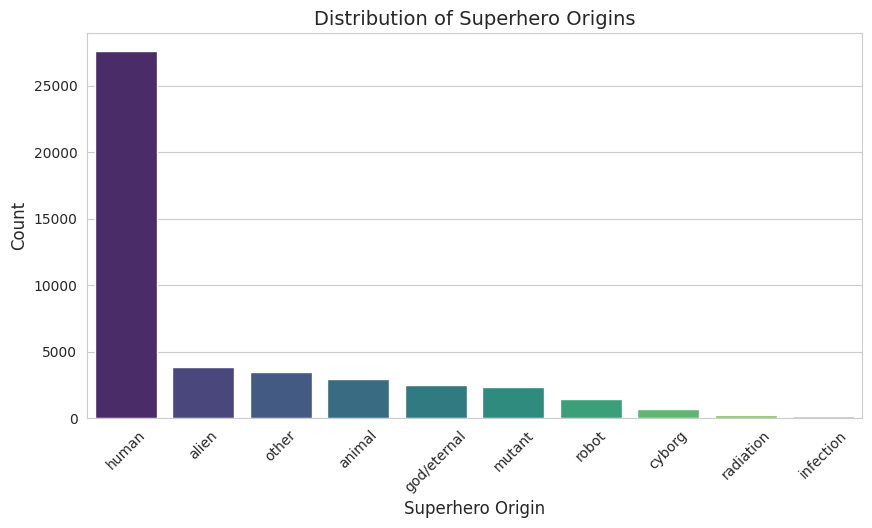

In [35]:

# Count occurrences of each origin
origin_counts = df['origin'].value_counts()

# Plot the bar chart
plt.figure(figsize=(10, 5))
sns.barplot(x=origin_counts.index, y=origin_counts.values, palette='viridis')

# Labels and title
plt.xlabel('Superhero Origin', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Superhero Origins', fontsize=14)
plt.xticks(rotation=45)
plt.show()

### 6.2  Analyzing Publisher Trends Over Time

In [36]:
plt.figure(figsize=(12, 6))

# Count number of heroes introduced per year per publisher
publisher_trends = df.groupby(['first_appeared_in_issue', 'publisher']).size().reset_index(name='Count')

# Plot trends
sns.lineplot(data=publisher_trends, x='first_appeared_in_issue', y='Count', hue='Publisher', marker="o")

# Labels and title
plt.xlabel('First Appearance in Issue', fontsize=12)
plt.ylabel('Number of Superheroes Introduced', fontsize=12)
plt.title('Superhero Introductions Over Time by Publisher', fontsize=14)
plt.legend(title="Publisher", bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()


ValueError: Could not interpret value `Publisher` for `hue`. An entry with this name does not appear in `data`.

<Figure size 1200x600 with 0 Axes>